# Інтерполяція

In [497]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
import scipy

# Завдання 1, інтерполяційна формула Гаусса

In [498]:
x_arr = np.array([1.0, 1.4, 1.8, 2.2, 2.6])
y_arr = np.array([3.75, 4.25, 4.0, 2.5, 2.0])

In [499]:
def create_differences_array(y_array):
    differences = np.zeros((np.size(y_array), np.size(y_array)))
    for i in np.arange(differences.shape[0]):
        differences[i][0] = y_array[i]
    for j in np.arange(1, differences.shape[0]):
        for i in np.arange(differences.shape[0] - j):
            if i + 1 < differences.shape[0] and j - 1 >= 0:
                differences[i][j] = differences[i+1][j-1] - differences[i][j-1]
    return differences

In [500]:
create_differences_array(y_arr)

array([[ 3.75,  0.5 , -0.75, -0.5 ,  2.75],
       [ 4.25, -0.25, -1.25,  2.25,  0.  ],
       [ 4.  , -1.5 ,  1.  ,  0.  ,  0.  ],
       [ 2.5 , -0.5 ,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  0.  ,  0.  ,  0.  ,  0.  ]])

In [501]:
def gaussian_interpolation(x_array, y_array):
    x_0 = x_array[int(np.floor(np.size(x_array)/2))]
    y_0 = y_array[int(np.floor(np.size(y_array)/2))]
    x = symbols('x')
    h = x_array[1] - x_array[0]
    polynomial = y_0
    differences = create_differences_array(y_array)
    for i in np.arange(1, np.size(y_array)):
        prod = 1
        for j in np.arange(i):
            prod *= ((x - x_0)/h + ((-1)**(j+1))*np.ceil(j/2))
        polynomial += (prod/factorial(i))*differences[int(np.floor(np.size(x_array)/2)) - int(np.ceil(i/2))][i]
    return polynomial

In [502]:
polynomial = gaussian_interpolation(x_arr, y_arr)

In [503]:
simplify(polynomial)

4.47591145833334*x**4 - 29.9479166666667*x**3 + 70.0846354166667*x**2 - 68.1770833333334*x + 27.314453125

In [504]:
arg = np.linspace(0.5, 3, 100)
x = symbols('x')

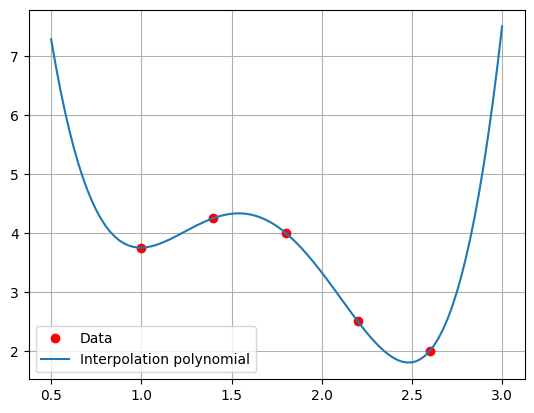

In [505]:
plt.plot(x_arr, y_arr, 'ro', label = "Data")
plt.plot(arg, lambdify(x, polynomial)(arg), label = "Interpolation polynomial")
plt.grid()
plt.legend()
plt.show()

In [506]:
x_new = []
y_new = []

for i in np.arange(np.size(x_arr)):
    x_new.append(x_arr[i])
    y_new.append(y_arr[i])
    if i+1 < np.size(x_arr):
        x_new.append((x_arr[i+1] + x_arr[i])/2)
        y_new.append(lambdify(x, polynomial)((x_arr[i+1] + x_arr[i])/2))

x_new = np.array(x_new)
y_new = np.array(y_new)

In [507]:
x_new

array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6])

In [508]:
y_new

array([3.75      , 3.95507812, 4.25      , 4.31445312, 4.        ,
       3.33007812, 2.5       , 1.87695312, 2.        ])

In [509]:
polynomial2 = gaussian_interpolation(x_new, y_new)

In [510]:
simplify(polynomial2)

2.06514699521049e-13*x**8 - 2.84990285339047e-12*x**7 + 1.70002900645727e-11*x**6 - 5.72458747072347e-11*x**5 + 4.47591145845233*x**4 - 29.947916666823*x**3 + 70.0846354167934*x**2 - 68.1770833333913*x + 27.3144531250115

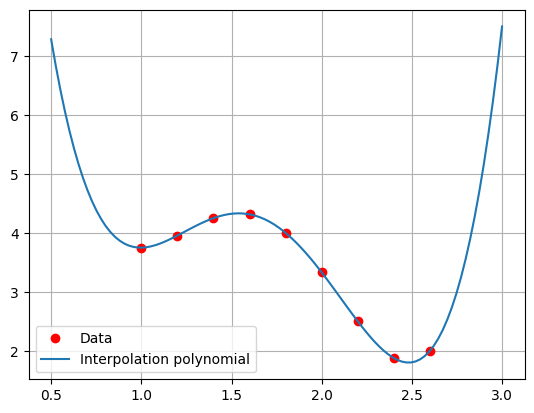

In [511]:
plt.plot(x_new, y_new, 'ro', label = "Data")
plt.plot(arg, lambdify(x, polynomial2)(arg), label = "Interpolation polynomial")
plt.grid()
plt.legend()
plt.show()

# Завдання 2, побудова таблиці за функцією та подальша інтерполяція

In [512]:
def func(x):
    return x*np.log(x) - 100

In [513]:
def create_table(function, beg_of_interval, end_of_interval, number_of_nodes):
    x = []
    for i in np.arange(number_of_nodes):
        x.append((beg_of_interval + end_of_interval)/2 + ((end_of_interval - beg_of_interval)/2)*np.cos(np.pi*((2*i)/(2*number_of_nodes))))
    x.sort()
    x = np.array(x)
    y = np.array(function(x))
    return x, y

In [514]:
x_arr, y_arr = create_table(func, 0.1, 2, 10)

In [515]:
x_arr

array([0.14649631, 0.28143386, 0.49160401, 0.75643386, 1.05      ,
       1.34356614, 1.60839599, 1.81856614, 1.95350369, 2.        ])

In [516]:
y_arr

array([-100.28138353, -100.35681812, -100.34907903, -100.21115109,
        -99.94877033,  -99.60320813,  -99.23563007,  -98.9124095 ,
        -98.69188602,  -98.61370564])

In [517]:
def interpolating_polynomial(x_array, y_array):
    x = symbols('x')
    polynomyal = 0
    for i in np.arange(np.size(x_array)):
        prod = 1
        for j in np.arange(np.size(x_array)):
            if j == i:
                continue
            prod *= ((x-x_array[j])/(x_array[i] - x_array[j]))
        polynomyal += y_array[i]*prod
    return polynomyal

In [518]:
x = symbols('x')
polynomial3 = interpolating_polynomial(x_arr ,y_arr)

In [519]:
simplify(polynomial3)

-0.0242512787699525*x**9 + 0.282874634511245*x**8 - 1.43872639298206*x**7 + 4.19470944372006*x**6 - 7.76788656110875*x**5 + 9.61513162939809*x**4 - 8.29598143568728*x**3 + 5.62141830721521*x**2 - 2.11764028376274*x - 100.069660695451

In [520]:
arg = np.linspace(0.1, 2, 100)

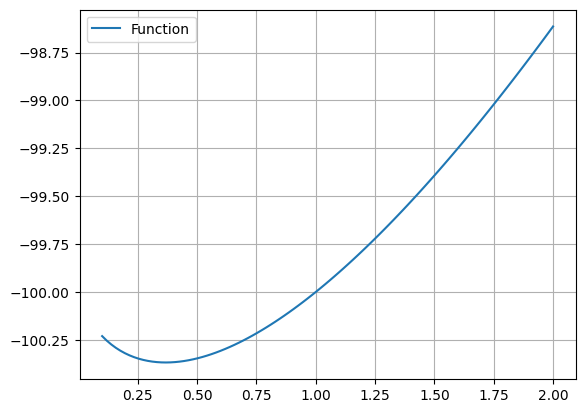

In [521]:
plt.plot(arg, func(arg), label = "Function")
plt.grid()
plt.legend()
plt.show()

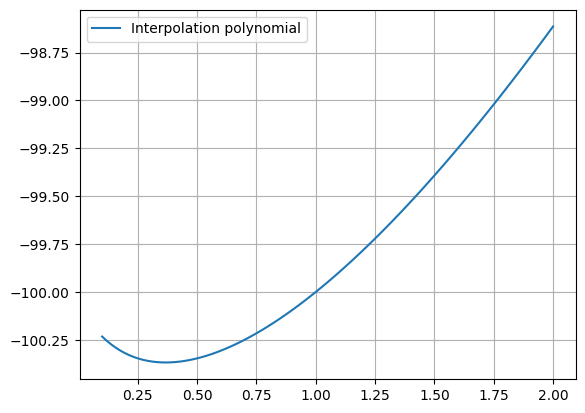

In [522]:
plt.plot(arg, lambdify(x, polynomial3)(arg), label = "Interpolation polynomial")
plt.grid()
plt.legend()
plt.show()

In [523]:
def remainder(val):
    return func(val) - lambdify(x, polynomial3)(val)

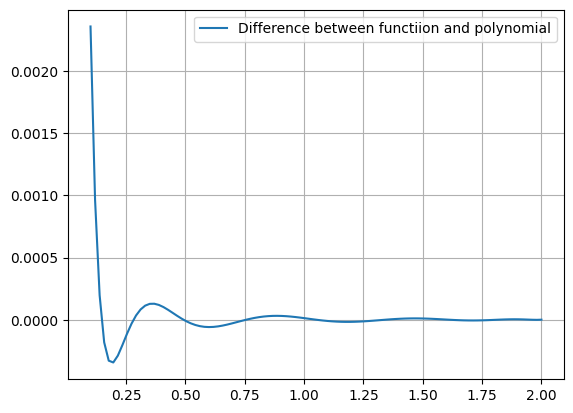

In [524]:
plt.plot(arg, remainder(arg), label = "Difference between functiion and polynomial")
plt.grid()
plt.legend()
plt.show()

In [525]:
def find_maximum(expr, a, b):
    x = symbols('x')
    deriv = diff(expr, x)
    der = lambdify(x, deriv)
    roots = scipy.optimize.fsolve(der, [a, b])
    f = lambdify(x, expr)
    arr = []
    arr.append(np.max(np.abs(f(roots))))
    arr.append(np.abs(f(a)))
    arr.append(np.abs(f(b)))
    return np.max(np.array(arr))

In [526]:
x = symbols('x')
expr_remainder = x*ln(x) - 100 - polynomial3

In [527]:
expr_func = x*ln(x) - 100

In [528]:
omega = 1
for i in np.arange(np.size(x_arr)):
    omega *= (x-x_arr[i])

In [529]:
M = find_maximum(diff(expr_func, x, np.size(x_arr)), x_arr[1], x_arr[9])
O = find_maximum(omega, x_arr[1], x_arr[9])
print(f"A priori error: {(M/factorial(np.size(x_arr))*O)}")

A priori error: 2.86090313745479


In [530]:
print(f"A posteriori error {find_maximum(expr_remainder, x_arr[1], x_arr[9])}")

A posteriori error 0.0001295358518689227


# Завдання 3, сплайн інтерполяція 

In [531]:
def cubic_splines_interpolation(x_array, y_array):
    h = x_array[1] - x_array[0]
    matrix = np.zeros((np.size(x_array)-2, np.size(x_array)))
    for i in np.arange(matrix.shape[0]):
        matrix[i][i] = 1
        matrix[i][i+1] = 4
        matrix[i][i+2] = 1
    matrix = np.delete(matrix, 0, 1)
    matrix = np.delete(matrix, matrix.shape[1]-1, 1)
    l = []
    for i in np.arange(2, np.size(y_array)):
        l.append(3*(y_array[i] - 2*y_array[i-1] + y_array[i-2])/h)
    l = np.array(l)
    p = np.linalg.solve(matrix, l)
    c = [0]
    for i in np.arange(np.size(p)):
        c.append(p[i])
    c.append(0)
    c = np.array(c)
    x = symbols('x')
    polynomial_array = []
    for i in np.arange(np.size(c) -1):
        polynomial = 0
        polynomial += y_array[i]
        polynomial += ((y_array[i+1] - y_array[i])/h - (h*(c[i+1] + 2*c[i])/3))*(x-x_array[i])
        polynomial += c[i]*((x-x_array[i])**2)
        polynomial += ((c[i+1] - 2*c[i])/(6*h))*((x-x_array[i])**3)
        polynomial_array.append(polynomial)
    return np.array(polynomial_array)

In [532]:
x = symbols('x')
polynomial_arr = cubic_splines_interpolation(x_new, y_new)

In [533]:
for i in np.arange(np.size(polynomial_arr)):
    print(simplify(polynomial_arr[i]))

0.990455863402062*x + 0.436684519974227*(x - 1.0)**3 + 2.75954413659794
-1.49706024484536*x**3 + 5.91343830541237*x**2 - 6.27031652706186*x + 5.5510269007732
0.424603334407217*x**3 - 2.5317634503866*x**2 + 5.08014859858248*x + 0.934936775128865
0.824037532216494*x**3 - 4.94271504510309*x**2 + 8.1131805734536*x + 0.611456990979386
1.30854341172681*x**3 - 8.05195916559282*x**2 + 13.0766047841496*x - 1.08096609213922
0.826554445876267*x**3 - 5.36072406572152*x**2 + 7.41476723582447*x + 3.33100434922699
1.97703567976809*x**3 - 12.8593649323457*x**2 + 24.550831588274*x - 10.3239791398202
-4.5843065399485*x**3 + 35.7575910115983*x**2 - 92.1711299935576*x + 80.4973944909801


In [534]:
arg = np.linspace(0.9, 2.7, 100)

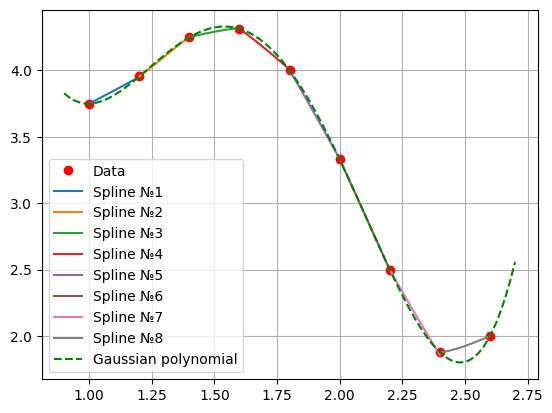

In [535]:
plt.plot(x_new, y_new, "ro", label = "Data")
for i in np.arange(np.size(polynomial_arr)):
    argi = np.linspace(x_new[i], x_new[i+1], 100)
    plt.plot(argi, lambdify(x, polynomial_arr[i])(argi), label = f"Spline №{i+1}")
plt.plot(arg, lambdify(x, polynomial2)(arg), "g--", label = "Gaussian polynomial")
plt.grid()
plt.legend()
plt.show()

# Завдання 4, наближення методом найменших квадратів

In [536]:
def mnk(x_array, y_array, polynomial_degree):
    matrix = np.zeros((np.size(x_array), polynomial_degree + 1))
    for i in np.arange(matrix.shape[0]):
        for j in np.arange(matrix.shape[1]):
            matrix[i][j] = (x_array[i])**(j)
    
    a = np.dot(np.matmul(np.linalg.inv(np.matmul(np.transpose(matrix), matrix)),
                          np.transpose(matrix)), y_array)
    x = symbols('x')
    polynomial = 0
    for i in np.arange(np.size(a)):
        polynomial += a[i]*(x**i)
    return polynomial

In [537]:
polynomial4 = mnk(x_new, y_new, 4)

In [538]:
polynomial4

4.47591145279883*x**4 - 29.9479166266261*x**3 + 70.0846353114069*x**2 - 68.1770832141054*x + 27.3144530751935

In [539]:
arg = np.linspace(0.5, 3, 100)
x = symbols('x')

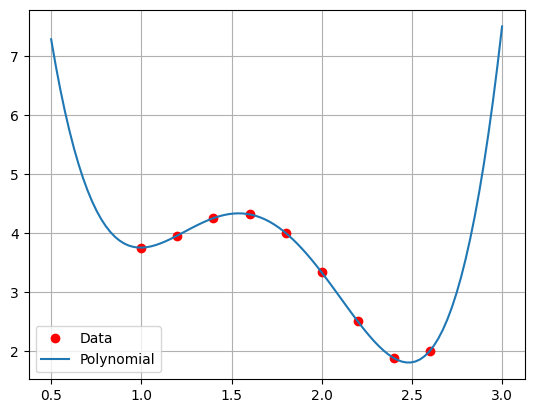

In [540]:
plt.plot(x_new, y_new, "ro", label = "Data")
plt.plot(arg, lambdify(x, polynomial4)(arg), label = "Polynomial")
plt.grid()
plt.legend()
plt.show()

In [541]:
polynomial5 = mnk(x_new, y_new, 3)

In [542]:
polynomial5

2.27864583328455*x**3 - 13.9857700890226*x**2 + 25.6482514876468*x - 10.3630022319011

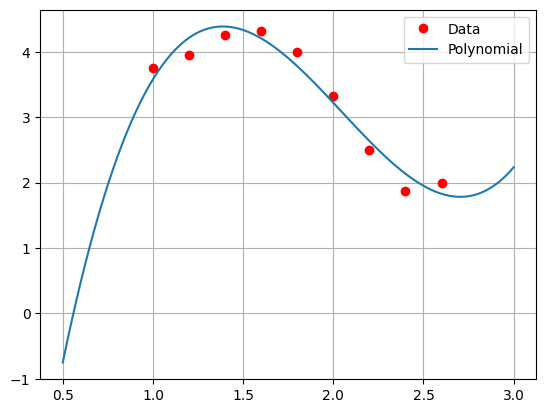

In [543]:
plt.plot(x_new, y_new, "ro", label = "Data")
plt.plot(arg, lambdify(x, polynomial5)(arg), label = "Polynomial")
plt.grid()
plt.legend()
plt.show()